In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

#rcparams
plt.rcParams.update({'font.size': 11})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 11}

In [3]:
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: ORCA2_1m_20150101_20151231
    description: planktom sms variables
    title: planktom sms variables
    Conventions: CF-1.5
    production: An IPSL model
    timeStamp: 2022-Mar-24 06:37:06 GMT
    dimensions(sizes): axis_nbounds(2), x(182), y(149), deptht(31), time_counter(12)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 Alkalini(time_counter,deptht,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 O2(time_counter,deptht,y,x), float32 DIC(time_counter,deptht,y,x), float32 PIIC(time_counter,deptht,y,x), float32 NO3(time_counter,deptht,y,x), float32 Si(time_counter,deptht,y,x), float32 PO4(time_counter,deptht,y,x), float32 Fer(time_counter,dept

Text(0.5, 1.0, 'mmol m$^{-3}$')

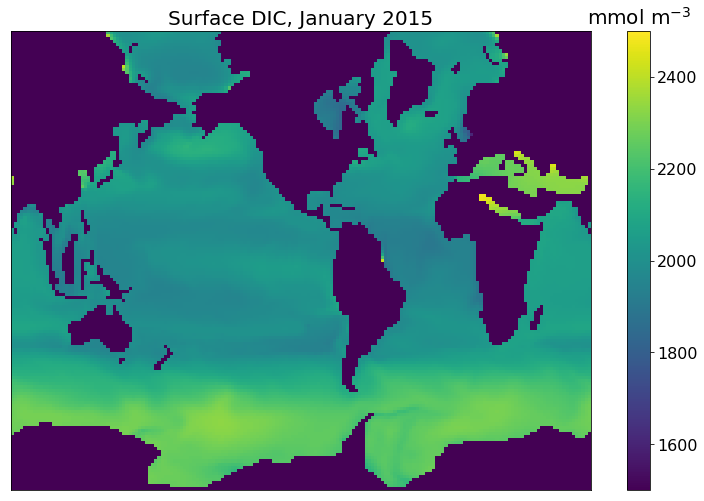

In [4]:
import glob
rdir = '/gpfs/data/greenocean/software/runs/'
trun = 'TOM12_TJ_T001'
yr = 2015
w = glob.glob(f'{rdir}{trun}/ORCA*{yr}*ptrc_T.nc')
t = nc.Dataset(w[0])
print(t)
t_DIC = t['DIC'][:]*1e6

fact = 1.3
fig = plt.figure(figsize=[10*fact, 6.5*fact])
plt.pcolormesh(t_DIC[0,0,:,:], vmin = 1500, vmax = 2500)
plt.title('Surface DIC, January 2015', fontsize = 20)
plt.xticks([])
plt.yticks([])
clb=plt.colorbar()
clb.ax.tick_params(labelsize=16) 
clb.ax.set_title('mmol m$^{-3}$',fontsize=20)


Text(0.5, 1.0, 'mmol m$^{-3}$')

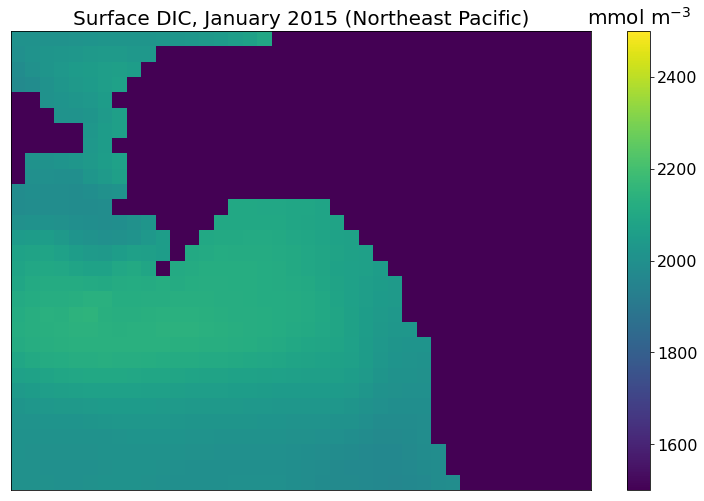

In [5]:
import glob
rdir = '/gpfs/data/greenocean/software/runs/'
trun = 'TOM12_TJ_T001'
yr = 2015
w = glob.glob(f'{rdir}{trun}/ORCA*{yr}*ptrc_T.nc')
t = nc.Dataset(w[0])
t_DIC = t['DIC'][:]*1e6

fact = 1.3
fig = plt.figure(figsize=[10*fact, 6.5*fact])
plt.pcolormesh(t_DIC[0,0,100:130,50:90], vmin = 1500, vmax = 2500)
plt.title('Surface DIC, January 2015 (Northeast Pacific)', fontsize = 20)
plt.xticks([])
plt.yticks([])
clb=plt.colorbar()
clb.ax.tick_params(labelsize=16) 
clb.ax.set_title('mmol m$^{-3}$',fontsize=20)


In [7]:
# tdir = '/gpfs/data/greenocean/software/products/MetOffice/withOzone/'
# tfilmet = 'MetOffice_wind2020.nc'
# MO = nc.Dataset(f'{tdir}{tfilmet}')
# print('')
# print(f'{tfilmet} file contents')
# print(MO)
# plin
# print(MO['gphi'][0:37,0])

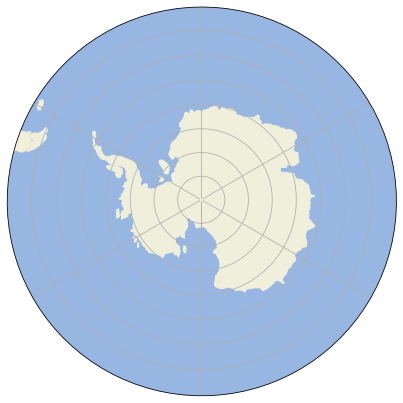

In [8]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

fact = 0.6
fig = plt.figure(figsize=[10*fact, 10*fact])
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

fig.subplots_adjust(bottom=0.05, top=0.95,left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND, zorder = 0)
ax1.add_feature(cfeature.OCEAN)

ax1.gridlines()


# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_boundary(circle, transform=ax1.transAxes)

plt.show()



In [9]:
import netCDF4 as nc
import mapfxn as mf
from importlib import reload
reload(mf)

help(mf.plot_southern)

tdirncep = '/gpfs/data/greenocean/software/products/NCEPForcingData/'
tfilncep = 'ncep_bulk_2020.nc'
print('')
print(f'{tfilncep} file contents')
NCEP = nc.Dataset(f'{tdirncep}{tfilncep}')
print(NCEP)

nlon = NCEP['nav_lon'][:]
nlat = NCEP['nav_lat'][:]
tdat = NCEP['wspd'][0,:,:]

ModuleNotFoundError: No module named 'mapfxn'

In [ ]:
# #plt.pcolormesh(nlon, gridlats, temperature, transform=rotated_pole)


# import matplotlib.path as mpath
# import matplotlib.pyplot as plt
# import numpy as np

# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# fact = 0.6
# fig = plt.figure(figsize=[10*fact, 10*fact])
# ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# fig.subplots_adjust(bottom=0.05, top=0.95,left=0.04, right=0.95, wspace=0.02)

# # Limit the map to -60 degrees latitude and below.
# #ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

# ax1.add_feature(cfeature.LAND, zorder = 0)
# #ax1.add_feature(cfeature.OCEAN)
# #ax1.pcolormesh(nlon,nlat,tdat, transform=ccrs.PlateCarree(), vmin = 0, vmax = 10)
# #plt.contourf

# plt.contourf(nlon, nlat, tdat, 60,
#              transform=ccrs.PlateCarree())
# ax1.gridlines()


# # Compute a circle in axes coordinates, which we can use as a boundary
# # for the map. We can pan/zoom as much as we like - the boundary will be
# # permanently circular.
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)

# ax1.set_boundary(circle, transform=ax1.transAxes)

# plt.show()



In [ ]:
print(np.min(nlat))

NameError: name 'nlon' is not defined

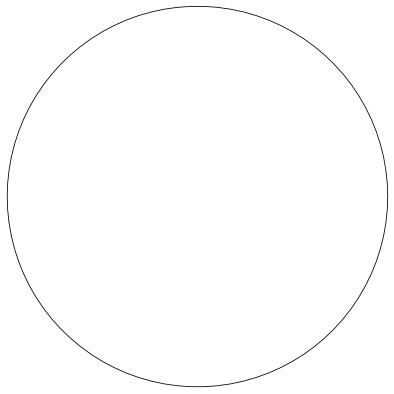

In [10]:

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_southern(ax1, lons, lats, tdat, tvmin, 
                  tvmax, intvl, northex = -50, fs = 12, tit = '', cbarlab = '', tcmap = 'viridis'):
    ax1.set_extent([-180, 180, -90, northex], ccrs.PlateCarree())
    
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    
    #plot data according to given levels
    tlev = np.arange(tvmin,tvmax+intvl,intvl)
    mesh = ax1.contourf(lons, lats, tdat, tlev, cmap = tcmap, vmin = tvmin, vmax = tvmax,
                 transform=ccrs.PlateCarree())
    
    #plot land
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='oldlace'))
    ax1.set_title(tit, fontsize = fs)
    fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
                 pad = 0.06, fraction = 0.045, shrink = 0.9, label = cbarlab)
    plt.show()
    
fact = 0.7
fig = plt.figure(figsize=[10*fact, 10*fact])
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())    
plot_southern(ax1, nlon, nlat, tdat, 0, 12, 1, fs = 12, tit = 'test', cbarlab = 'tests')

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [14]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#import mapfxn as mf
from importlib import reload
#reload(mf)


tdirncep = '/gpfs/data/greenocean/software/products/NCEPForcingData/'
tfilncep = 'ncep_bulk_2020.nc'
print('')
print(f'{tfilncep} file contents')
NCEP = nc.Dataset(f'{tdirncep}{tfilncep}')
print(NCEP)

nlon = NCEP['nav_lon'][:]
nlat = NCEP['nav_lat'][:]
tdat = NCEP['wspd'][0,:,:]


ncep_bulk_2020.nc file contents
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(182), y(149), deptht(1), time_counter(366)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 deptht(y,x), float32 time_counter(time_counter), float32 air(time_counter,y,x), float32 pres(time_counter,y,x), float32 humidity(time_counter,y,x), float32 wspd(time_counter,y,x), float32 uwnd(time_counter,y,x), float32 vwnd(time_counter,y,x), float32 tcdc(time_counter,y,x), float32 prate(time_counter,y,x)
    groups: 


NameError: name 'mf' is not defined

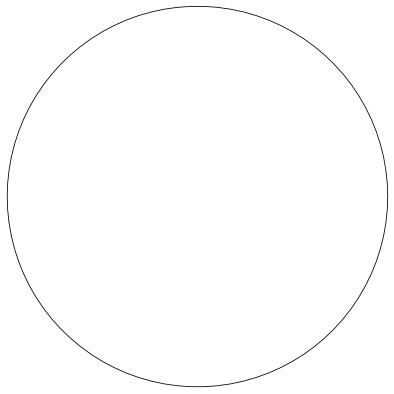

In [15]:
fact = 0.7
fig = plt.figure(figsize=[10*fact, 10*fact])
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())  
mf.plot_southern(fig, ax1, nlon, nlat, tdat, 0, 20, 1, fs = 12, tit = 'test', cbarlab = 'tests')

In [16]:
basin= nc.Dataset('/gpfs/home/e415/data/masks/basin_masks.nc')
basin = nc.Dataset('/gpfs/data/greenocean/software/resources/ModelResources/BasinMasks/clq_basin_masks_ORCA.nc')

nav_lat = basin['Y'][:,:]
nav_lon = basin['X'][:,:]

ATL = basin['ATL'][:,:]; PAC = basin['PAC'][:,:]; IND = basin['IND'][:,:]
SO = basin['SO'][:,:]; ARCTIC = basin['ARCTIC'][:,:]; P1 = basin['P1'][:,:]
P2 = basin['P2'][:,:]; P3 = basin['P3'][:,:]; P4 = basin['P4'][:,:]
P5 = basin['P5'][:,:]; A1 = basin['A1'][:,:]; A2 = basin['A2'][:,:]
A3 = basin['A3'][:,:]; A4 = basin['A4'][:,:]; A5 = basin['A5'][:,:]
I3 = basin['I3'][:,:]; I4 = basin['I4'][:,:]; I5 = basin['A5'][:,:]

msks = [ATL, PAC, IND, SO, ARCTIC, P1, P2, P3, P4, P5, A1, A2, A3, A4, A5, I3, I4, I5]
titles = ['ATL', 'PAC', 'IND', 'SO', 'ARCTIC', 'P1', 'P2', 'P3',
          'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']



In [21]:
print(basin)
print(np.shape(nav_lat))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): X(182), Y(149)
    variables(dimensions): float32 X(Y,X), float32 Y(Y,X), float32 ATL(Y,X), float32 PAC(Y,X), float32 IND(Y,X), float32 SO(Y,X), float32 ARCTIC(Y,X), float32 P1(Y,X), float32 P2(Y,X), float32 P3(Y,X), float32 P4(Y,X), float32 P5(Y,X), float32 A1(Y,X), float32 A2(Y,X), float32 A3(Y,X), float32 A4(Y,X), float32 A5(Y,X), float32 I3(Y,X), float32 I4(Y,X), float32 I5(Y,X)
    groups: 
(149, 182)


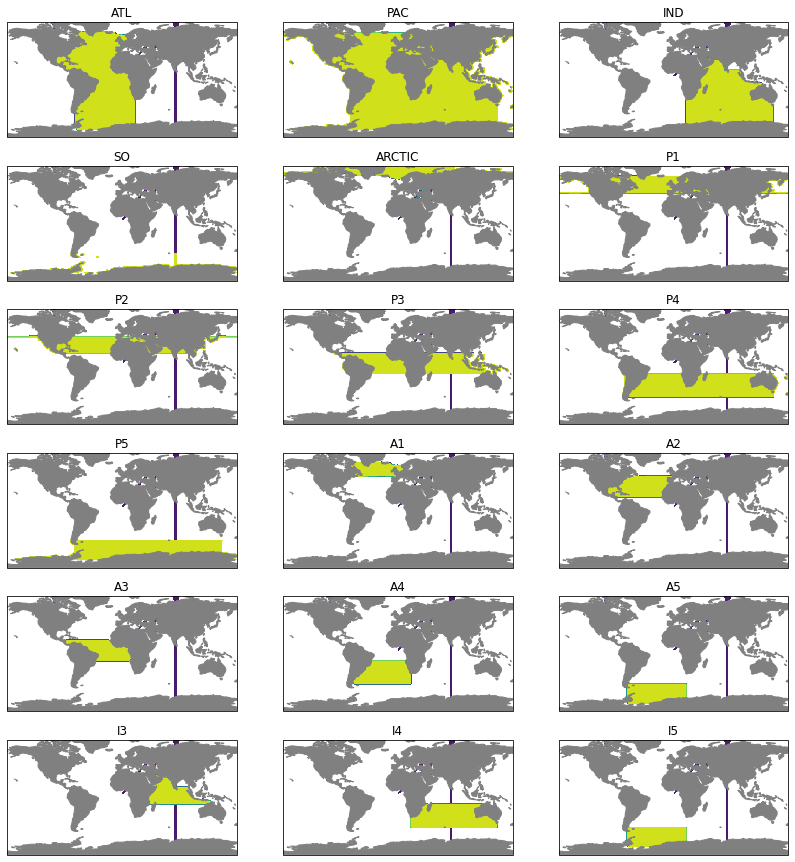

In [18]:
# fig, axs = plt.subplots(6,3, figsize=(20*fact, 22*fact), \
#                         facecolor='w', edgecolor='k', projection = ccrs.PlateCarree())
# axs = axs.ravel()

# axs[0].plot(np.arange(1,3,1), np.arange(1,3,1))
# ax1 = axs[0]
import cartopy.feature as cfeature

fig = plt.figure(figsize=[20*fact, 22*fact])

for i in range(1,19):
    ax1 = fig.add_subplot(6, 3, i, projection=ccrs.PlateCarree())


    ax1.set_extent([-170, 170, -90, 80], ccrs.PlateCarree())
    mesh = ax1.contourf(nav_lon, nav_lat, msks[i-1],
                 transform=ccrs.PlateCarree())
    ax1.set_title(titles[i-1])
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='grey'))


In [19]:
ATL[0:10,0:10]

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)